##. 

https://medium.com/energynotes/python-based-oil-gas-price-analysis-9fa82e002415

## 예제 13-2-1 유가 정보 데이터 알아보기

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
brent_df = pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls",        ##  인터넷 상의 엑셀 파일의 주소를 입력한다 
                         sheet_name="Data 1",                                       ## 엑셀 내의 시트를 지정한다
                         skiprows=2,                                                ## 헤더에 불필요한 2개의 행을 제거한다
                         names=['Date', 'Brent'])                                   ## 열의 이름을 지정한다 

In [3]:
brent_df.head()

,Date,Brent
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
brent_df.shape

(8231, 2)

In [5]:
brent_df.columns

Index(['Date', 'Brent'], dtype='object')

In [6]:
brent_df.dtypes

Date     datetime64[ns]
Brent           float64
dtype: object

In [7]:
wti_df = pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/RWTCd.xls",  ##  인터넷 상의 엑셀 파일의 주소를 입력한다 
                       sheet_name="Data 1",                                 ## 엑셀 내의 시트를 지정한다
                       skiprows=2,                                          ## 헤더에 불필요한 2개의 행을 제거한다
                       names=['Date', 'WTI'])                                 ## 열의 이름을 지정한다 

In [8]:
wti_df.head()

,Date,WTI
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [9]:
wti_df.shape

(8521, 2)

In [10]:
natural_df = pd.read_excel("https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDd.xls",   ##  인터넷 상의 엑셀 파일의 주소를 입력한다
                           sheet_name="Data 1",                                     ## 엑셀 내의 시트를 지정한다
                           skiprows=2,                                             ## 헤더에 불필요한 2개의 행을 제거한다
                           names=['Date', 'GAS'])                                  ## 열의 이름을 지정한다 

In [11]:
natural_df.shape

(5732, 2)

In [12]:
natural_df.head()

,Date,GAS
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [13]:
natural_df.tail()                      ## 마지막 정보를 읽는다 

,Date,GAS
5727,2019-10-15,2.29
5728,2019-10-16,2.44
5729,2019-10-17,2.29
5730,2019-10-18,2.08
5731,2019-10-21,2.13


In [14]:
(brent_df['Date'] < natural_df.loc[0, 'Date']).sum()          ## 두 데이터에 날자별 길이가 차이가 있어서 그 개수를 확인한다 

2453

In [15]:
brent_df_n = brent_df.loc[2453:]                             ## 동일한 날짜로 데이터를 다시 만든다 

In [16]:
brent_df_n.head()

,Date,Brent
2453,1997-01-07,24.76
2454,1997-01-08,24.78
2455,1997-01-09,24.83
2456,1997-01-10,24.22
2457,1997-01-13,23.41


In [17]:
(wti_df['Date'] < natural_df.loc[0, 'Date']).sum()         ## 두 데이터에 날자별 길이가 차이가 있어서 그 개수를 확인한다 

2799

In [18]:
wti_df_n = wti_df.loc[2799:]                               ## 동일한 날짜로 데이터를 다시 만든다 

In [19]:
wti_df_n.head()

,Date,WTI
2799,1997-01-07,26.25
2800,1997-01-08,26.55
2801,1997-01-09,26.30
2802,1997-01-10,26.15
2803,1997-01-13,25.20


In [20]:
total_df = pd.DataFrame()                           ## 새로운 데이터프레임을 하나 만든다 

In [21]:
total_df['Date'] = brent_df_n["Date"]               ## 날짜를 열을 추가한다 

In [22]:
total_df['Brent'] = brent_df_n["Brent"]              ## 데이터를 추가한다 

In [23]:
total_df = pd.merge(total_df, wti_df_n, on='Date')          ## 동일한 날짜로 두 데이터프레임을 통합한다 

In [24]:
total_df = pd.merge(total_df, natural_df, on='Date')         ## 동일한 날짜로 두 데이터프레임을 통합한다 

In [25]:
total_df.head()                                         ## 3개의 데이터프레임을 하나로 통합했다 

,Date,Brent,WTI,GAS
0,1997-01-07,24.76,26.25,3.82
1,1997-01-08,24.78,26.55,3.80
2,1997-01-09,24.83,26.30,3.61
3,1997-01-10,24.22,26.15,3.92
4,1997-01-13,23.41,25.20,4.00


In [26]:
total_df.tail()

,Date,Brent,WTI,GAS
5660,2019-10-15,59.19,52.81,2.29
5661,2019-10-16,59.30,53.42,2.44
5662,2019-10-17,59.35,53.89,2.29
5663,2019-10-18,59.96,53.75,2.08
5664,2019-10-21,58.95,53.28,2.13


In [27]:
total_df.isna().sum()             ##  결측값을 확인한다  

Date     0
Brent    0
WTI      0
GAS      1
dtype: int64

In [28]:
total_df = total_df.fillna(0)   ## 하나의 결측값을 0으로 바꾼다 

In [29]:
total_df.isna().sum()

Date     0
Brent    0
WTI      0
GAS      0
dtype: int64

In [30]:
total_df = total_df.set_index('Date')         ## 날짜를 인덱스로 변환한다 

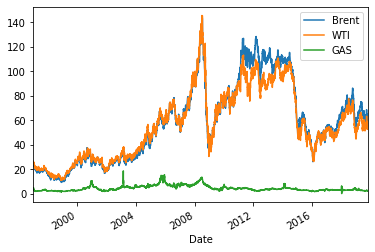

In [31]:
total_df.plot.line()                                     ## 3개의 값을 선 그래프로 그린다 

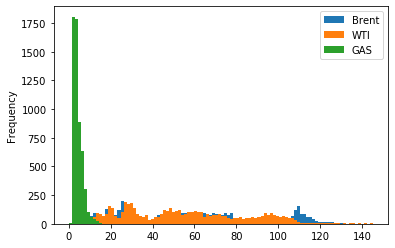

In [32]:
total_df.plot.hist(bins=100)                                  ## 히스토그램으로 그린다 

## 가격 변화율의 분포를 알아보기

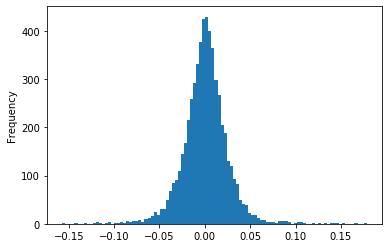

In [33]:
total_df['WTI'].pct_change().plot.hist(bins=100)                 ## 가격 변화율에 대한 분포를 확인하면 정규분포인 것을 알 수 있다 

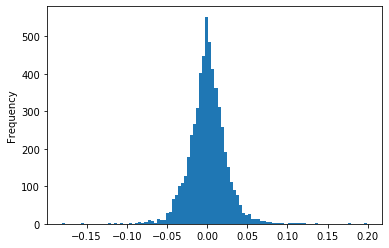

In [34]:
total_df['Brent'].pct_change().plot.hist(bins=100)       ## 가격 변화율에 대한 분포를 확인하면 정규분포인 것을 알 수 있다 

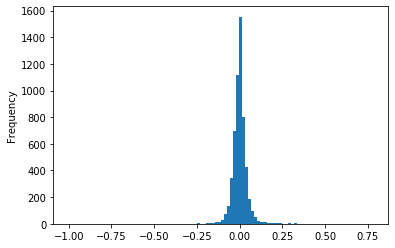

In [35]:
total_df['GAS'].pct_change().replace([np.inf, -np.inf], 0).plot.hist(bins=100)   ## 가격 변화율에 대한 분포를 확인하면 폭이 좁은 
                                                                                 ## 정규분포인 것을 알 수 있다 

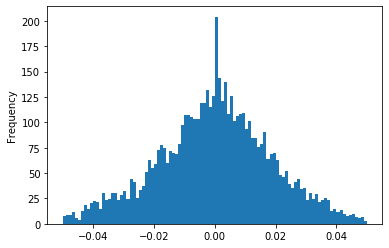

In [36]:
total_df['Brent'].pct_change().plot.hist(bins=100, range=[-0.05, 0.05])        ## 특정 범위만 추출한다

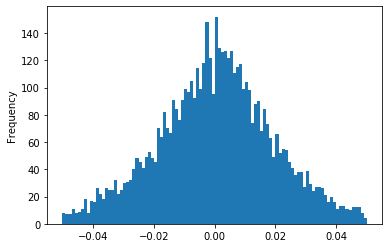

In [37]:
total_df['WTI'].pct_change().plot.hist(bins=100, range=[-0.05, 0.05])          ## 특정 범위만 추출한다

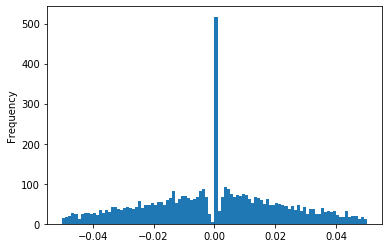

In [38]:
total_df['GAS'].pct_change().replace([np.inf, -np.inf], 0).plot.hist(bins=100, range=[-0.05, 0.05])       ## 특정 범위만 추출한다

In [39]:
total_df.describe()                            ## 기술 통계를 확인한다 

,Brent,WTI,GAS
count,5665.000000,5665.00000,5665.000000
mean,58.470249,56.25860,4.280141
std,32.487794,28.69407,2.190145
min,9.100000,10.82000,0.000000
25%,28.550000,30.19000,2.740000
50%,55.790000,53.21000,3.630000
75%,78.030000,77.43000,5.340000
max,143.950000,145.31000,18.480000


In [40]:
total_df = total_df.reset_index()                           ## 특정 연도, 월, 주, 요일에 대한 처리를 위해 인덱스 지정을 해제한다 

In [41]:
total_df['year'] = total_df["Date"].dt.year              ## 년도를 열로 추가한다 

In [42]:
total_df['month'] = total_df["Date"].dt.month            ## 월을  열로 추가한다 

In [43]:
total_df['week'] = total_df["Date"].dt.week             ## 주를 열로 추가한다 

In [44]:
total_df['dayofweek'] = total_df["Date"].dt.dayofweek    ## 요일을 열로 추가한다 

In [45]:
total_df.head()

,Date,Brent,WTI,GAS,year,month,week,dayofweek
0,1997-01-07,24.76,26.25,3.82,1997,1,2,1
1,1997-01-08,24.78,26.55,3.80,1997,1,2,2
2,1997-01-09,24.83,26.30,3.61,1997,1,2,3
3,1997-01-10,24.22,26.15,3.92,1997,1,2,4
4,1997-01-13,23.41,25.20,4.00,1997,1,3,0


In [46]:
total_df = total_df.set_index('Date')                      ## 다시 날짜를 인덱스로 잡는다 

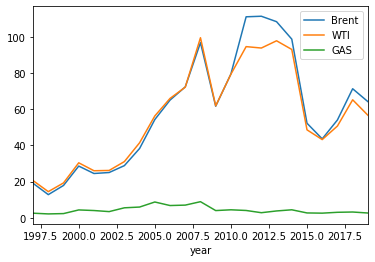

In [47]:
total_df.groupby('year')['Brent',"WTI", 'GAS'].mean().plot()     ## 연도별 평균으로 변화를 확인한다 

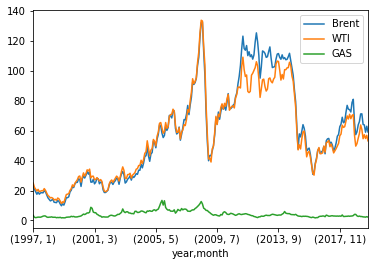

In [48]:
total_df.groupby(['year','month'])['Brent',"WTI", 'GAS'].mean().plot()       ## 년도와 열의 평균으로 선그래프를 그린다 

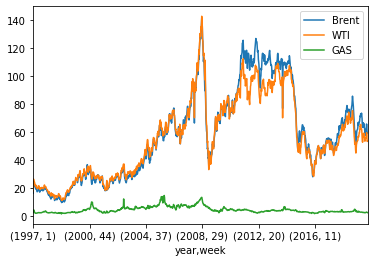

In [49]:
total_df.groupby(['year', 'week'])['Brent',"WTI", 'GAS'].mean().plot()     ## 년도와 주별로 가격의 변화를 확인한다 

In [50]:
pivot_wti = total_df.pivot_table(values='WTI',                 ## 월을 행, 년도를 열로 해서 평균가격으로 피봇테이블을 만든다 
                                 columns=['year'], 
                                 index=['month'], 
                                 aggfunc=np.mean)

In [51]:
pivot_wti[[*pivot_wti.columns[:5]]].head()                       ## 5개년치의 금액을 확인한다 

year,1997,1998,1999,2000,2001
month,,,,,
1,25.025000,16.724000,12.514737,27.259474,29.585714
2,22.169444,16.060000,12.013684,29.366000,29.609474
3,20.944737,15.115455,14.676522,29.754545,27.244545
4,19.695455,15.354000,17.331000,25.628333,27.490000
5,20.819048,14.857895,17.660000,28.928571,28.629091


In [52]:
pivot_wti[2019].head()                      ## 특정 년도만 확인한다 

month
1    51.375714
2    54.954737
3    58.151429
4    63.862381
5    60.826818
Name: 2019, dtype: float64

In [53]:
pivot_wti.loc[0] = pivot_wti.loc[12, :].shift(1)          ## 변화율을 계산하기 위해 12월에 해당하는 것을 하나 더 이동해서 첫번째 행을 추가
pivot_wti.fillna(method='ffill', inplace=True)            ## 결측값은 전 값으로 대체한다 
pivot_wti = pivot_wti.sort_index()

In [54]:
pivot_wti[[*pivot_wti.columns[:5]]].head()

year,1997,1998,1999,2000,2001
month,,,,,
0,18.339524,18.339524,11.335714,26.051579,28.512105
1,25.025000,16.724000,12.514737,27.259474,29.585714
2,22.169444,16.060000,12.013684,29.366000,29.609474
3,20.944737,15.115455,14.676522,29.754545,27.244545
4,19.695455,15.354000,17.331000,25.628333,27.490000


In [55]:
wmc = pivot_wti.pct_change()                               ## 변화률을 구한다 
wmc = wmc.drop(wmc.index[0])                               ## 0번 행을 제거한다 

In [56]:
wmc[[*wmc.columns[:5]]].head()                                 ## 변화를을 확인한다 

year,1997,1998,1999,2000,2001
month,,,,,
1,0.364539,-0.088090,0.104010,0.046366,0.037654
2,-0.114108,-0.039703,-0.040037,0.077277,0.000803
3,-0.055243,-0.058814,0.221650,0.013231,-0.079871
4,-0.059647,0.015782,0.180866,-0.138675,0.009009
5,0.057048,-0.032311,0.018983,0.128773,0.041437


In [57]:
wmc_r_c = pd.DataFrame()                                            ## 새로운 데이터프레임을 하나 만든다 
wmc_r_c['raise'] = wmc[wmc > 0].count(axis=1)/len(wmc.columns)       ## 오른 배율을 추가한다 
wmc_r_c['decline'] = wmc[wmc < 0].count(axis=1)/len(wmc.columns)      ## 내린 비율을 추가한다 
wmc_r_c['sum']  = wmc_r_c['raise']  + wmc_r_c['decline']              ## 합산을 한다. 

In [58]:
wmc_r_c

,raise,decline,sum
month,,,
1,0.782609,0.217391,1.000000
2,0.608696,0.391304,1.000000
3,0.652174,0.347826,1.000000
4,0.739130,0.260870,1.000000
5,0.608696,0.391304,1.000000
6,0.565217,0.434783,1.000000
7,0.695652,0.304348,1.000000
8,0.608696,0.391304,1.000000
9,0.565217,0.434783,1.000000


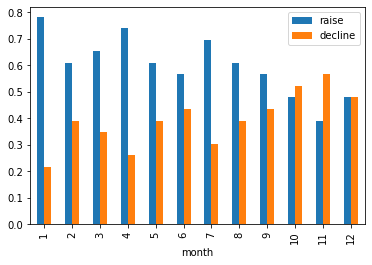

In [59]:
wmc_r_c[['raise','decline']].plot.bar()                      ## 오른 것과 내린 것을 막대그래프로 확인한다 

In [60]:
pivot_brent = total_df.pivot_table(values='Brent', 
                                   columns=['year'], 
                                   index=['month'], 
                                   aggfunc=np.mean)

In [61]:
pivot_brent[[*pivot_brent.columns[:5]]].head()

year,1997,1998,1999,2000,2001
month,,,,,
1,23.382778,15.177000,11.130526,25.485789,25.605238
2,20.871111,14.099474,10.271579,27.818000,27.527368
3,19.164737,13.103182,12.511304,27.418636,24.497273
4,17.555909,13.526500,15.294500,22.764444,25.600000
5,19.022857,14.363158,15.225263,27.737619,28.313636


In [62]:
pivot_brent.pct_change()[[*pivot_brent.columns[:5]]].head()

year,1997,1998,1999,2000,2001
month,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,-0.107415,-0.070997,-0.077170,0.091510,0.075068
3,-0.081758,-0.070662,0.218051,-0.014356,-0.110076
4,-0.083947,0.032307,0.222454,-0.169746,0.045014
5,0.083559,0.061853,-0.004527,0.218462,0.106001


In [63]:
pivot_brent.loc[0] = pivot_brent.loc[12, :].shift(1)

In [64]:
pivot_brent[[*pivot_brent.columns[:5]]].head()

year,1997,1998,1999,2000,2001
month,,,,,
1,23.382778,15.177000,11.130526,25.485789,25.605238
2,20.871111,14.099474,10.271579,27.818000,27.527368
3,19.164737,13.103182,12.511304,27.418636,24.497273
4,17.555909,13.526500,15.294500,22.764444,25.600000
5,19.022857,14.363158,15.225263,27.737619,28.313636


In [65]:
pivot_brent.fillna(method='ffill', inplace=True)

In [66]:
pivot_brent = pivot_brent.sort_index()

In [67]:
pivot_brent[[*pivot_brent.columns[:5]]].head()

year,1997,1998,1999,2000,2001
month,,,,,
0,17.181905,17.181905,9.824286,25.473158,25.660000
1,23.382778,15.177000,11.130526,25.485789,25.605238
2,20.871111,14.099474,10.271579,27.818000,27.527368
3,19.164737,13.103182,12.511304,27.418636,24.497273
4,17.555909,13.526500,15.294500,22.764444,25.600000


In [68]:
bmc = pivot_brent.pct_change()

In [69]:
bmc[[*bmc.columns[:5]]].head()

year,1997,1998,1999,2000,2001
month,,,,,
0,NaN,NaN,NaN,NaN,NaN
1,0.360896,-0.116687,0.132960,0.000496,-0.002134
2,-0.107415,-0.070997,-0.077170,0.091510,0.075068
3,-0.081758,-0.070662,0.218051,-0.014356,-0.110076
4,-0.083947,0.032307,0.222454,-0.169746,0.045014


In [70]:
bmc = bmc.drop(bmc.index[0])

In [71]:
bmc[[*bmc.columns[:5]]].head()

year,1997,1998,1999,2000,2001
month,,,,,
1,0.360896,-0.116687,0.132960,0.000496,-0.002134
2,-0.107415,-0.070997,-0.077170,0.091510,0.075068
3,-0.081758,-0.070662,0.218051,-0.014356,-0.110076
4,-0.083947,0.032307,0.222454,-0.169746,0.045014
5,0.083559,0.061853,-0.004527,0.218462,0.106001


In [72]:
bmc_r_c = pd.DataFrame()

In [73]:
bmc_r_c['raise'] = bmc[bmc > 0].count(axis=1)/len(bmc.columns)

In [74]:
bmc_r_c['decline'] = bmc[bmc < 0].count(axis=1)/len(bmc.columns)

In [75]:
bmc_r_c['sum']  = bmc_r_c['raise']  + bmc_r_c['decline']

In [76]:
bmc_r_c

,raise,decline,sum
month,,,
1,0.739130,0.260870,1.000000
2,0.652174,0.347826,1.000000
3,0.608696,0.391304,1.000000
4,0.695652,0.304348,1.000000
5,0.608696,0.391304,1.000000
6,0.434783,0.565217,1.000000
7,0.608696,0.391304,1.000000
8,0.608696,0.391304,1.000000
9,0.608696,0.391304,1.000000


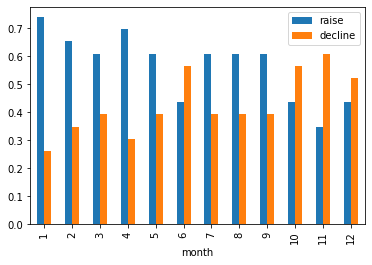

In [77]:
bmc_r_c[['raise','decline']].plot.bar()

In [78]:
pivot_gas = total_df.pivot_table(values='GAS', 
                                 columns=['year'], 
                                 index=['month'], 
                                 aggfunc=np.mean)

In [79]:
pivot_gas.loc[0] = pivot_gas.loc[12, :].shift(1)
pivot_gas.fillna(method='ffill', inplace=True)
pivot_gas = pivot_gas.sort_index()

In [80]:
gmc = pivot_gas.pct_change()
gmc = gmc.drop(gmc.index[0])

In [81]:
gmc_r_c = pd.DataFrame()
gmc_r_c['raise'] = gmc[gmc > 0].count(axis=1)/len(gmc.columns)
gmc_r_c['decline'] = gmc[gmc < 0].count(axis=1)/len(gmc.columns)
gmc_r_c['sum']  = gmc_r_c['raise']  + gmc_r_c['decline']

In [82]:
gmc_r_c

,raise,decline,sum
month,,,
1,0.521739,0.478261,1.000000
2,0.347826,0.652174,1.000000
3,0.478261,0.521739,1.000000
4,0.652174,0.347826,1.000000
5,0.695652,0.304348,1.000000
6,0.521739,0.478261,1.000000
7,0.260870,0.695652,0.956522
8,0.347826,0.652174,1.000000
9,0.521739,0.478261,1.000000


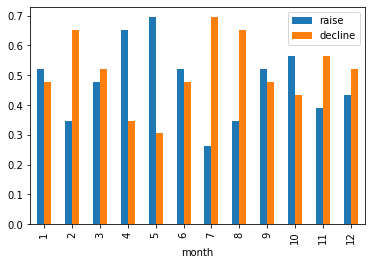

In [83]:
gmc_r_c[['raise','decline']].plot.bar()